In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
from matplotlib import pyplot as plt

In [13]:
def get_sample(n):
    x=np.random.uniform(-5,5,n).reshape(n,1)
    y=np.where((x<2.5) & (x>-2.5),1,0)
    return torch.from_numpy(x.astype('float32')).cuda(),torch.from_numpy(y.astype('float32')).cuda()

In [14]:
class Model(nn.Module):
    def __init__(self,din,dout):
        super(Model, self).__init__()
        self.linear1=nn.Linear(din,3)
        self.linear2=nn.Linear(3,dout)
        self.sigmoid=nn.Sigmoid()
        self.tanh=nn.Tanh()
    def forward(self, x):
        #y=self.sigmoid(self.linear2(self.linear1(x)))
        y=self.linear1(x)
        y=self.tanh(y)
        y=self.linear2(y)
        y=self.sigmoid(y)
        return y

In [15]:
model=Model(1,1).cuda()
optim=torch.optim.SGD(model.parameters(),.01)

In [16]:
def train(n):
    x,y=get_sample(n)
    y_pred=model(x)
    loss=F.mse_loss(y_pred,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    return loss,y,y_pred

In [17]:
def test(n):
    x,y=get_sample(n)
    y_pred=model(x)
    plt.scatter(x.cpu().numpy(),y_pred.cpu().detach().numpy())
    plt.show()

tensor(0.2496, device='cuda:0', grad_fn=<MseLossBackward>)


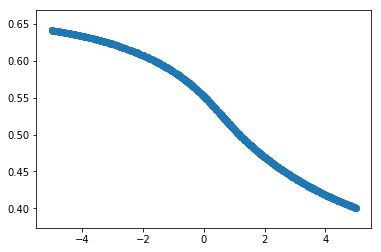

In [ ]:
for i in range(50000):
    loss,y,y_pred=train(10000)
    if i % 5000 == 0:
        print(loss)
    if i % 10000 == 0:
        test(1000)